# 미니프로젝트
- MNIST 데이터 셋을 이용한 필기숫자 식별 신경망회로 개발

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# 텐서플로우에서 mnist데이터 불러오기
data_train, data_test = tf.keras.datasets.mnist.load_data()
(image_train, labels_train) = data_train
(image_test, labels_test) = data_test

# 훈련 데이터, 검증 데이터 shape, 개수
print("train set =", image_train.shape, labels_train.shape)
print("test  set =", image_test.shape, labels_test.shape)


train set = (60000, 28, 28) (60000,)
test  set = (10000, 28, 28) (10000,)


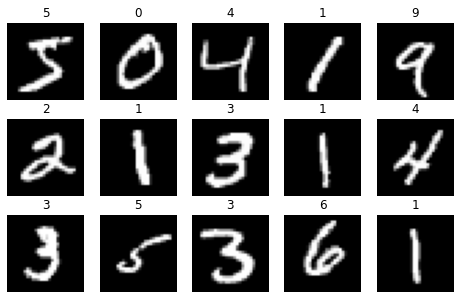

In [2]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow 로 시각화
    ax.imshow(image_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(labels_train[i]))
    
# plt.tight_layout()
plt.show()

In [3]:
# 정규화 전 이미지 최대/최소값 확인
print("[정규화 전] 최댓값 : {0}, 최솟값 : {1}".format(image_train.max(),image_train.min()))

#정규화
image_train, image_test = image_train/255.0, image_test/255.0

# 정규화 후 이미지 최대/최소값 확인
print("[정규화 전] 최댓값 : {0}, 최솟값 : {1}".format(image_train.max(),image_train.min()))


[정규화 전] 최댓값 : 255, 최솟값 : 0
[정규화 전] 최댓값 : 1.0, 최솟값 : 0.0


In [4]:
# test 셋에도 정규화
image_test = image_test / image_test.max()

In [5]:
# 모델 생성
model = keras.models.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(516,activation = 'relu'),
    layers.Dense(248,activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation = 'softmax')
])
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']) 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 516)               405060    
                                                                 
 dense_1 (Dense)             (None, 248)               128216    
                                                                 
 dense_2 (Dense)             (None, 32)                7968      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 541,574
Trainable params: 541,574
Non-trai

In [6]:
# 모델 훈련
model.fit(image_train, labels_train,
          validation_data = (image_test, labels_test),
          epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2571 - accuracy: 0.9256 - val_loss: 0.1190 - val_accuracy: 0.9652
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9687 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0766 - accuracy: 0.9788 - val_loss: 0.1021 - val_accuracy: 0.9716
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9827 - val_loss: 0.0915 - val_accuracy: 0.9756
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9850 - val_loss: 0.0746 - val_accuracy: 0.9797
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0418 - accuracy: 0.9883 - val_loss: 0.0810 - val_accuracy: 0.9796
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.1040 - val_accuracy:

In [7]:
# 모델 평가
test_loss, test_acc = model.evaluate(image_test, labels_test, batch_size = 32)

print("검증 셋 정확도 :", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9822
검증 셋 정확도 : 0.982200026512146


In [8]:
# 모델 저장
model.save('Mini_project_Model')
del model


INFO:tensorflow:Assets written to: Mini_project_Model\assets


In [9]:
import cv2
# 이미지 불러오기
img = cv2.imread('./image_data/3_team/0.jpg',cv2.IMREAD_GRAYSCALE)

# 이미지 resize, 정규화
img_resize = cv2.resize(img,(28,28))
img_not = cv2.bitwise_not(img_resize)/255.0
img_input = img_not.reshape(-1,28,28,1)


예측 결과   : 0
예측 정확도 : 1.0


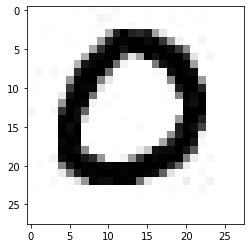

In [10]:
# 예측할 이미지 출력
plt.imshow(img_resize, cmap = 'gray')
# 모델 불러오기
model = keras.models.load_model('Mini_project_Model')
# 예측하기
output = model.predict(img_input)
print("예측 결과   :", np.argmax(output[0])) # 예측 결과 출력
print("예측 정확도 :", np.max(output[0])) # 예측 정확도 출력


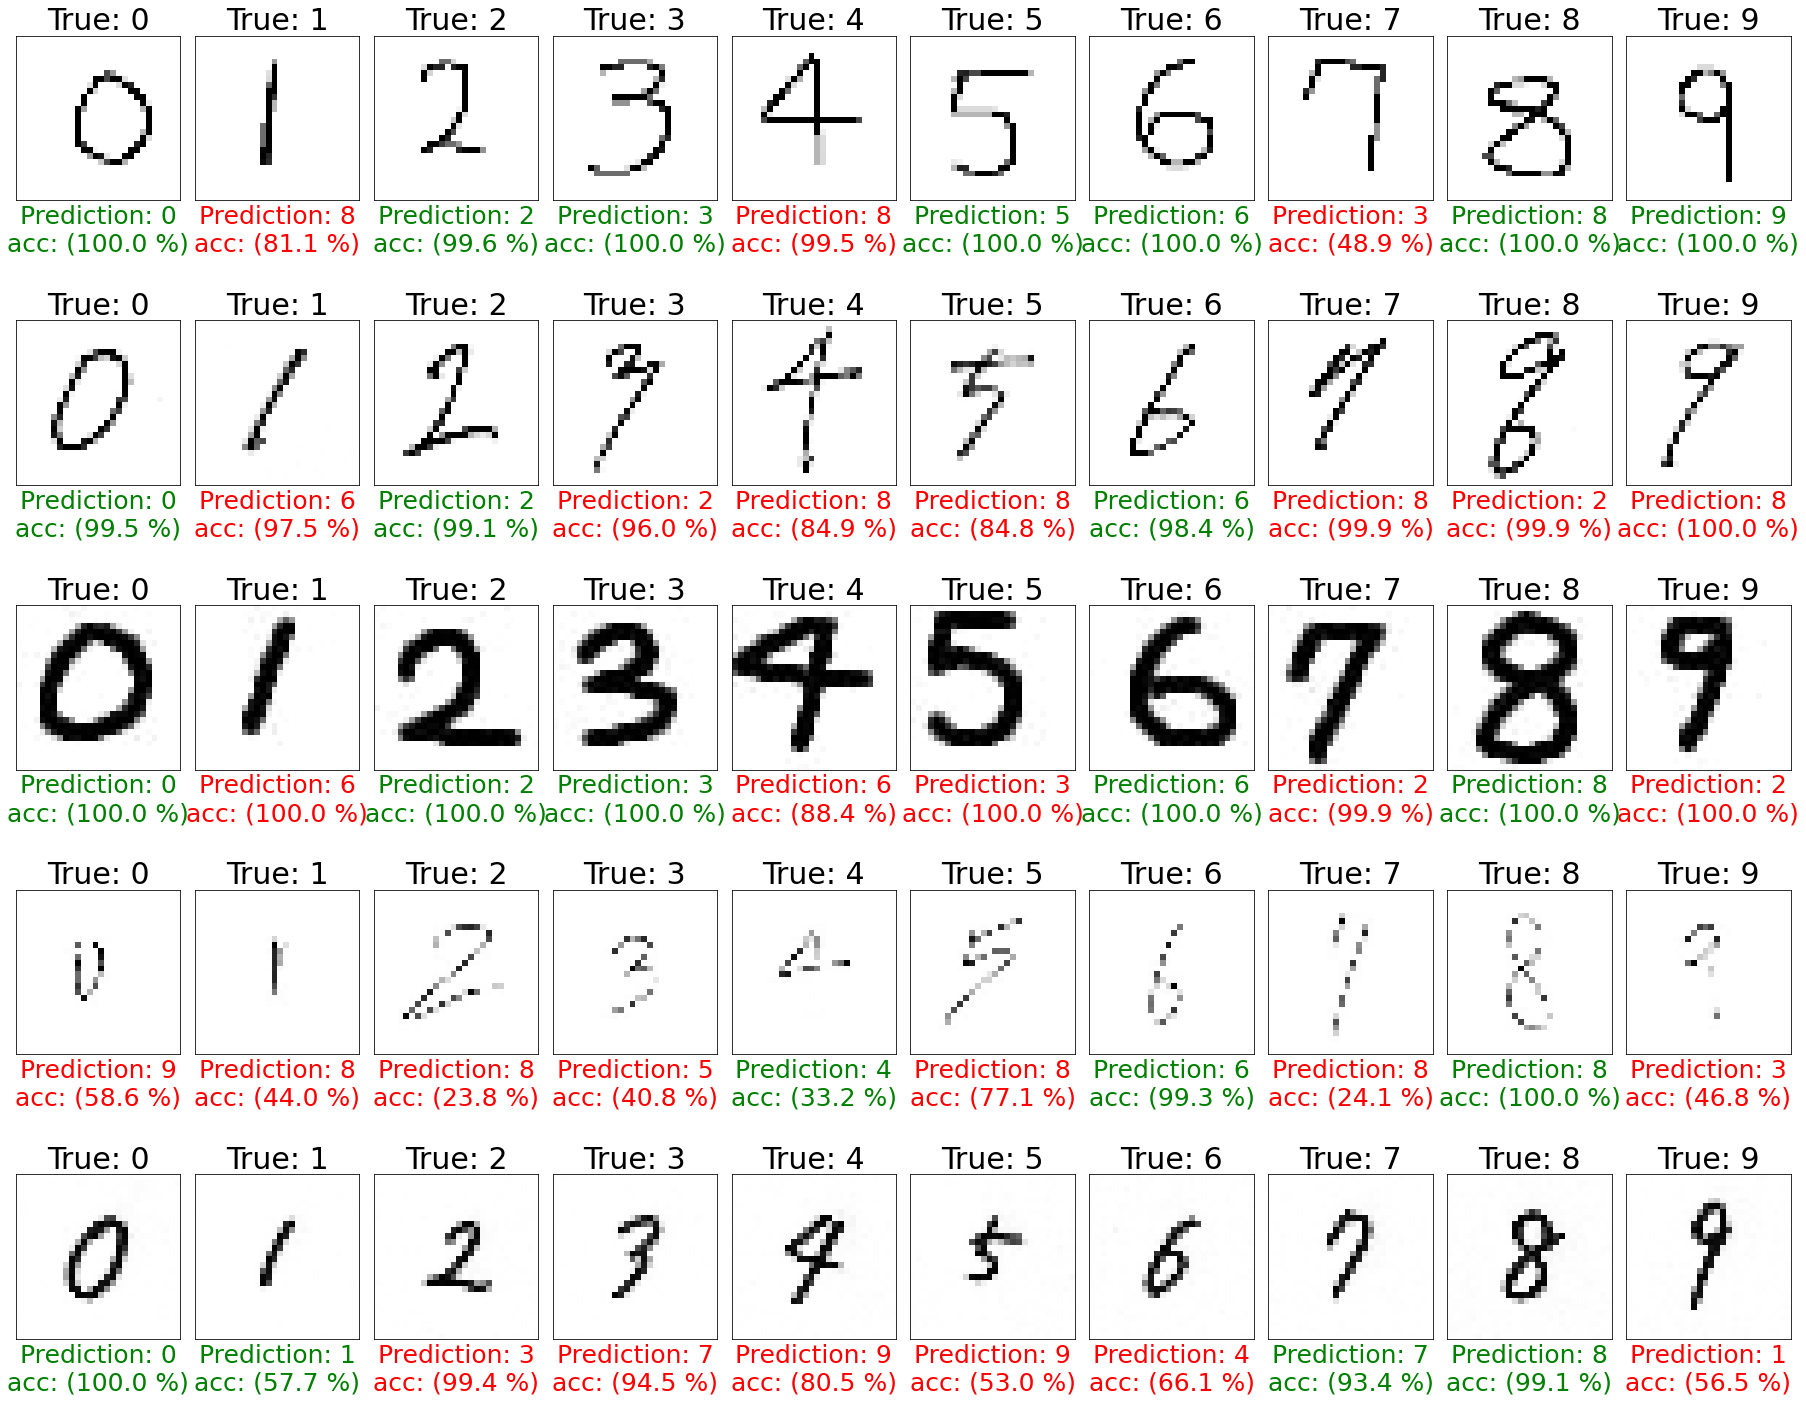

In [11]:
# 각 팀의 데이터 시각화

# canvas 생성
fig, axes = plt.subplots(5, 10)
fig.set_size_inches(25, 20)

# 각 팀의 손글씨 불러와서 예측하기
for i in range(1, 6):
    for j in range(0, 10):
        img = cv2.imread(f'./image_data/{i}_team/{j}.jpg',cv2.IMREAD_GRAYSCALE)
        ax = axes[i-1, j]

        img_resize = cv2.resize(img,(28,28))
        img_not = cv2.bitwise_not(img_resize)/255.0
        img_input = img_not.reshape(-1,28,28,1)
        
        # 예측하기
        output = model.predict(img_input)
        # 정답
        true = j
        # 예측값
        pred = np.argmax(output[0])
        # 예측 정확도
        confidence = np.max(output[0])*100
        
        # imshow로 이미지 시각화
        ax.imshow(img_resize, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'True: {true}', fontsize = 30)
        # 맞으면 초록색, 틀리면 빨간색
        if true != pred:
            ax.set_xlabel(f'Prediction: {pred}\nacc: ({confidence:.1f} %)', fontsize = 25, color = 'red')
        else:
            ax.set_xlabel(f'Prediction: {pred}\nacc: ({confidence:.1f} %)', fontsize = 25, color = 'green')
            

plt.tight_layout()
plt.show()